<a href="https://colab.research.google.com/github/alexandrufalk/tensorflow/blob/Master/02_neural_network_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification with TensorFlow

A classification problem involves predicting whether something is one thing or another.
for example, you might want to:

Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.

Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.

Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.




# Typical architecture of a classification neural network

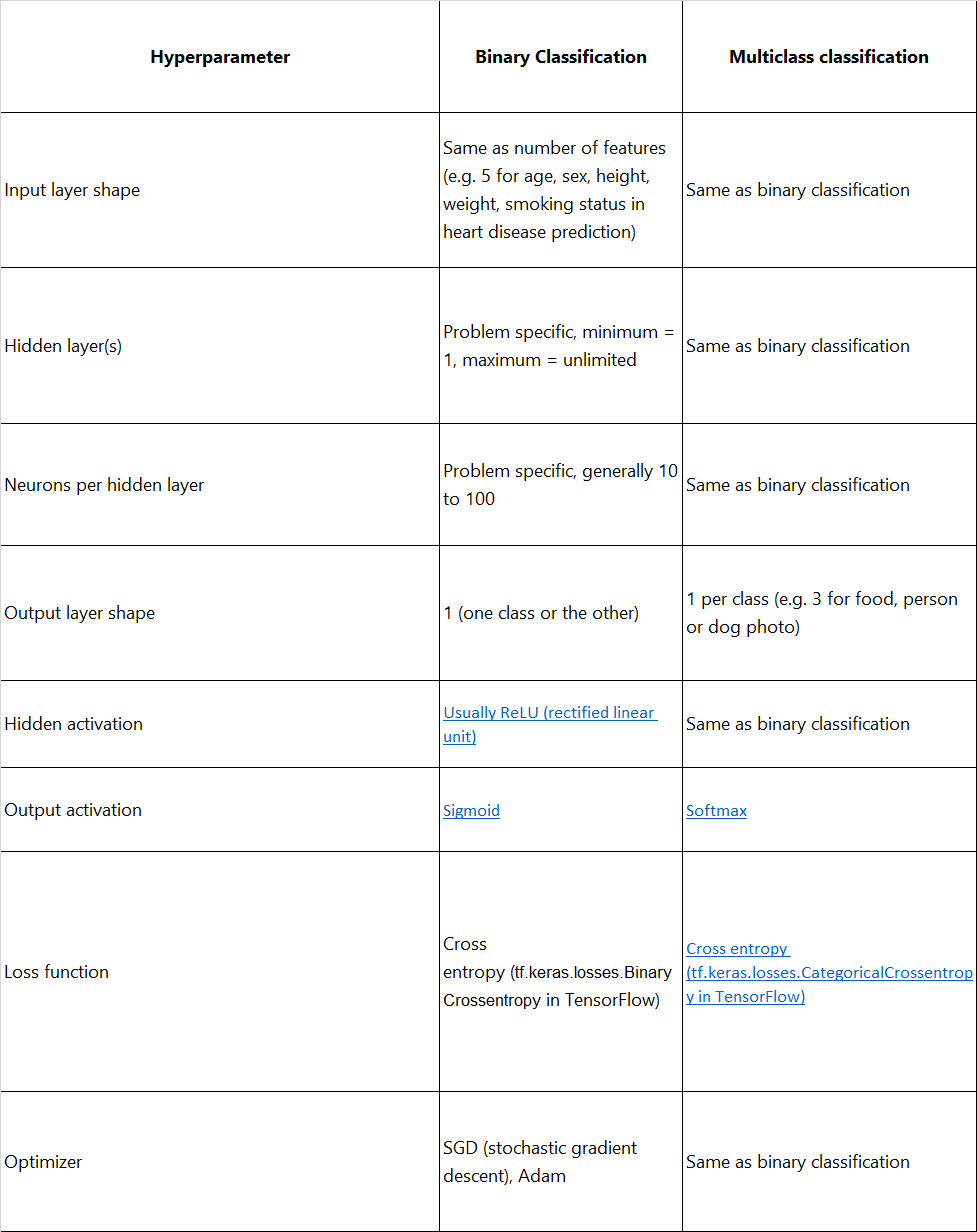

In [6]:
import tensorflow as tf
import numpy as np



# Creating data to view and fit

In [7]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples=1000

# Create circles
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [31]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [8]:
# Make dataframe of features and labels
import pandas as pd
circles=pd.DataFrame({'X0':X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


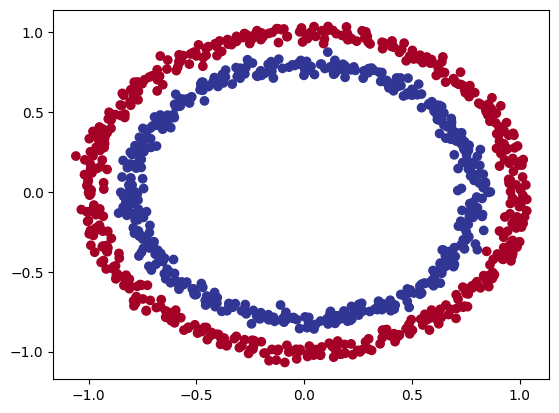

In [9]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)


# Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:

# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [ ]:

# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [6]:
# Create the model

#Set random seed
tf.random.set_seed(42)

#1. Create the model
model1=tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#3. Fit the model

model1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.4489 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7486 - accuracy: 0.4980
Epoch 3/5
32/32 [==============================] - 0s 978us/step - loss: 0.7120 - accuracy: 0.4920
Epoch 4/5
32/32 [==============================] - 0s 981us/step - loss: 0.6998 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4930


In [ ]:
# Training the model for longer
model1.fit(X,y,epochs=200, verbose=0)

In [ ]:
#Evaluate
model1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [7]:
#Improving the model

#set random seed
tf.random.set_seed(42)

#1 Creating the model
model2=tf.keras.Sequential([tf.keras.layers.Dense(100),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
                            ])
#2 Compile
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#3 Fit the model
model2.fit(X,y,epochs=100,verbose=0)

In [8]:
# Evaluate the model
model2.evaluate(X,y)

32/32 [==============================] - 0s 959us/step - loss: 0.6932 - accuracy: 0.5110


[0.6932076215744019, 0.5109999775886536]

In [9]:
 model2.output_shape[-1]

1

In [10]:
# to visualize the model's predictions we're going to create a function plot_decision_boundary()

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  #Create X values
  x_in=np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  # Make predictions
  y_pred=model.predict(x_in)

  # Check for multi-class
   # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 0s 771us/step
doing binary classifcation...


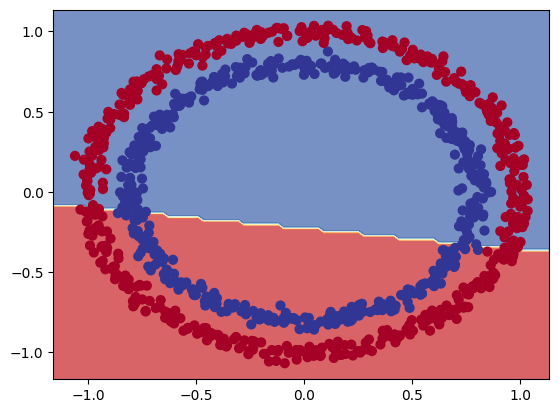

In [14]:
# Check out the predictions our model is making
plot_decision_boundary(model2,X,y)

In [34]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)



In [18]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100, verbose=0)

2/2 [==============================] - 0s 5ms/step


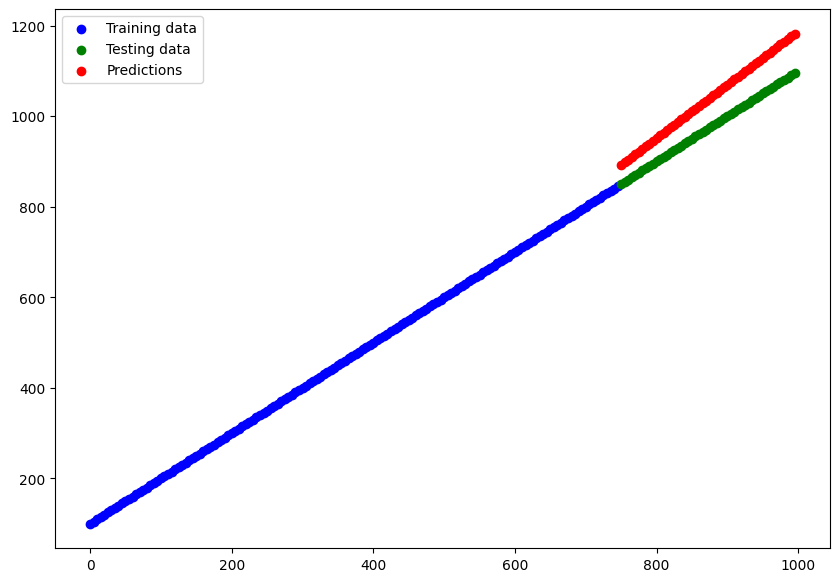

In [ ]:

# Make predictions with our trained model
y_reg_preds = model3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

#The missing piece: Non-linearity

add to models we've built before is the use of the activation keyword.

In [13]:
# model with activation linear

# Setup random seed

tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100,verbose=0)

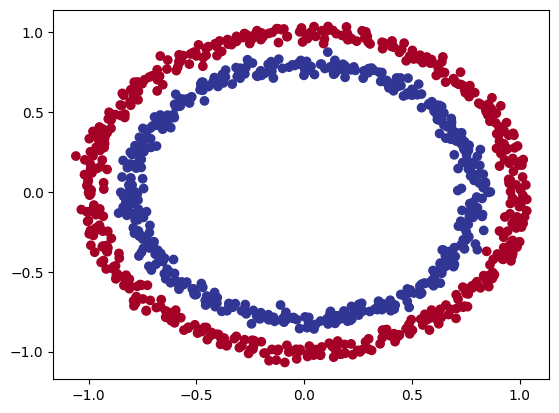

In [14]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


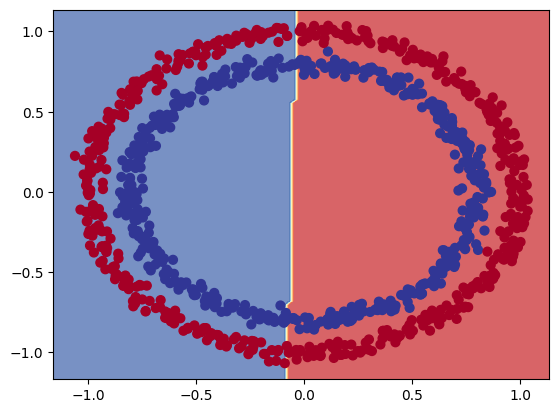

In [17]:

# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

In [20]:
# change the activation function on our output layer too

# Set random seeds

tf.random.set_seed(42)

# 1. Create the model
model5=tf.keras.Sequential([tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])

#2. Compile the model
model5.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
#3. Fit the model
history=model5.fit(X,y, epochs=250, verbose=0)

In [21]:
model5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000


[0.003166966140270233, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


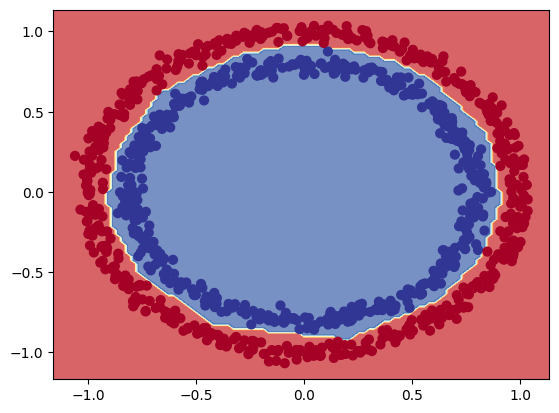

In [22]:
plot_decision_boundary(model5,X,y)

In [23]:

# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

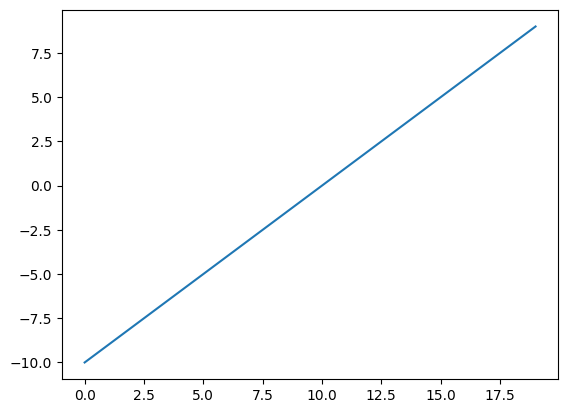

In [24]:
# Visualize our toy tensor
plt.plot(A);

In [25]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

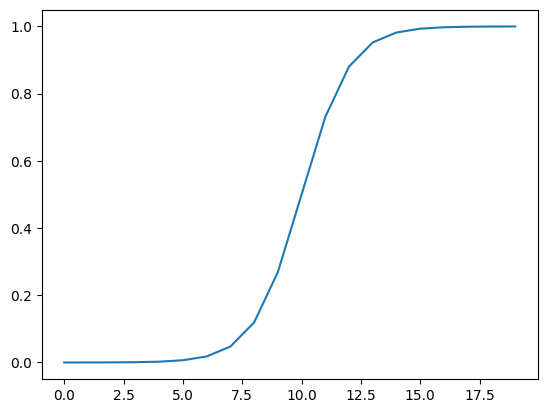

In [26]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

In [27]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

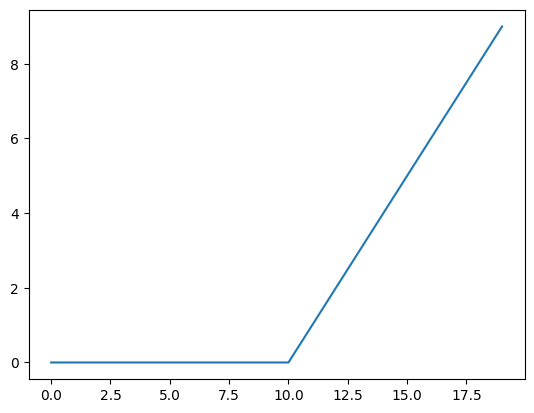

In [28]:

# Plot ReLU-modified tensor
plt.plot(relu(A));

# Evaluating and improving our classification model

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42)

len(X_train)

800

In [13]:
X_train,y_train

(array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        ...,
        [ 0.01574478, -1.02998534],
        [ 1.01102578,  0.16802846],
        [ 0.55778227, -0.57087612]]),
 array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 

In [37]:
# Creating new model

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model6=tf.keras.Sequential([tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])
#2. Compile the model
model6.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

#3. Fit the model
history6=model6.fit(X_train,y_train, epochs=100, verbose=0)

In [27]:
# Evaluate the model
loss, accuracy=model6.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy:{accuracy}")

7/7 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9950
loss:0.007674488238990307
accuracy:0.9950000047683716


313/313 [==============================] - 0s 781us/step
doing binary classifcation...
313/313 [==============================] - 0s 817us/step
doing binary classifcation...


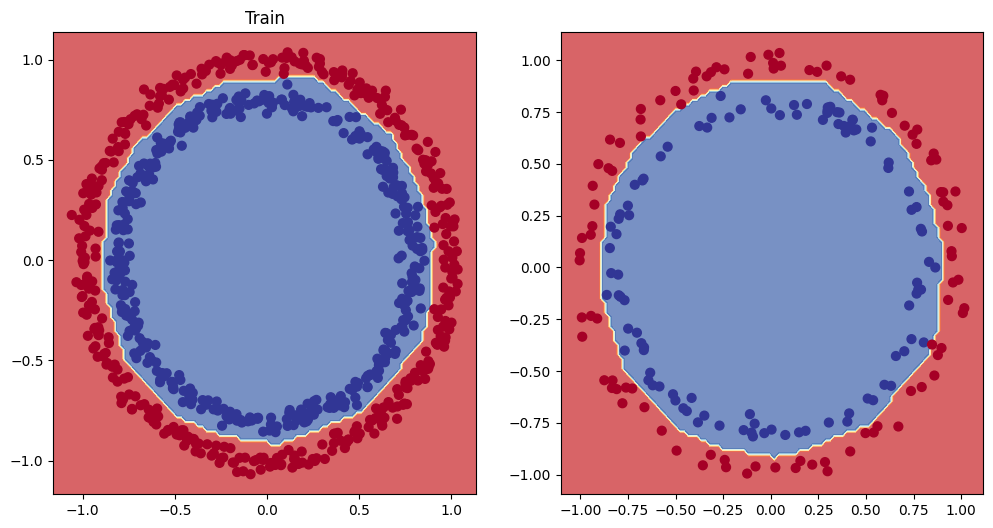

In [38]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model6,X=X_train,y=y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model6,X=X_test,y=y_test)
plt.show()

In [53]:
#Plot the loss curves

In [39]:
pd.DataFrame(history6.history)

,loss,accuracy
0,0.690692,0.52625
1,0.678679,0.59875
2,0.659004,0.65250
3,0.618544,0.75500
4,0.567707,0.75875
...,...,...
95,0.000559,1.00000
96,0.000567,1.00000
97,0.000557,1.00000
98,0.000575,1.00000


Text(0.5, 1.0, 'model 6 training curves')

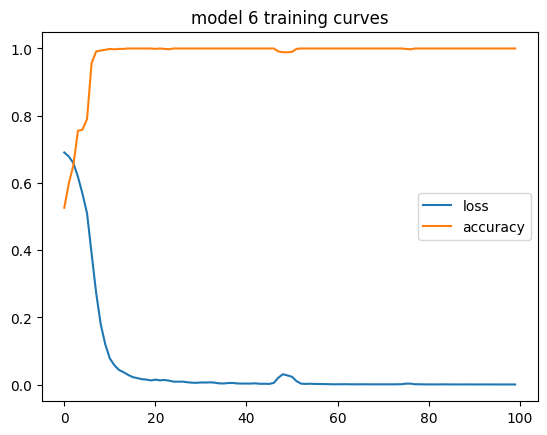

In [40]:
# Plot the loss curves
pd.DataFrame(history6.history).plot()
plt.title("model 6 training curves")

# Learnig callback
🔑 Note: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [45]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model7=tf.keras.Sequential([tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid'),
                            ])

#2. Compile the model
model7.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
#Create the learning rate scheduler callbak

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20)) #traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

#3. Fit the model (passing the lr_scheduler callback)
history7=model7.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler],
                    verbose=0)

<Axes: xlabel='epochs'>

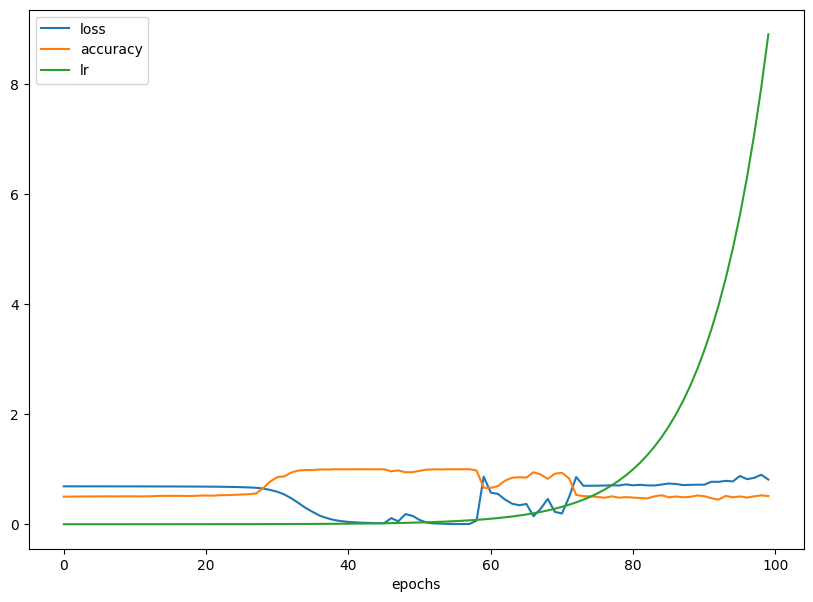

In [46]:
# Checkout the history
pd.DataFrame(history7.history).plot(figsize=(10,7),xlabel='epochs')

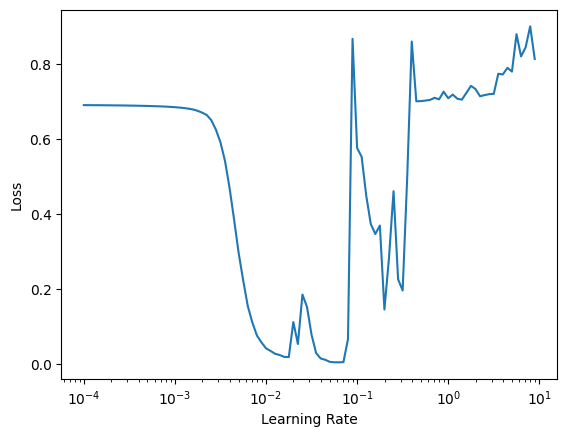

In [47]:
# Plot learning rate vs. loss
plt.plot(history7.history['lr'], history7.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.xscale('log')
plt.show()

In [29]:
#Use learning rate  0.02 for the model
#Set random seed
tf.random.set_seed(42)

#Create the model

model8=tf.keras.Sequential([tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])

#Compile the model
model8.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics=['accuracy'])
# Fit the model
history8=model8.fit(X_train,y_train,epochs=35,verbose=0)

In [30]:
#Evaluate the model
model8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 1.0000


[0.008905146270990372, 1.0]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...
313/313 [==============================] - 2s 5ms/step
doing binary classifcation...


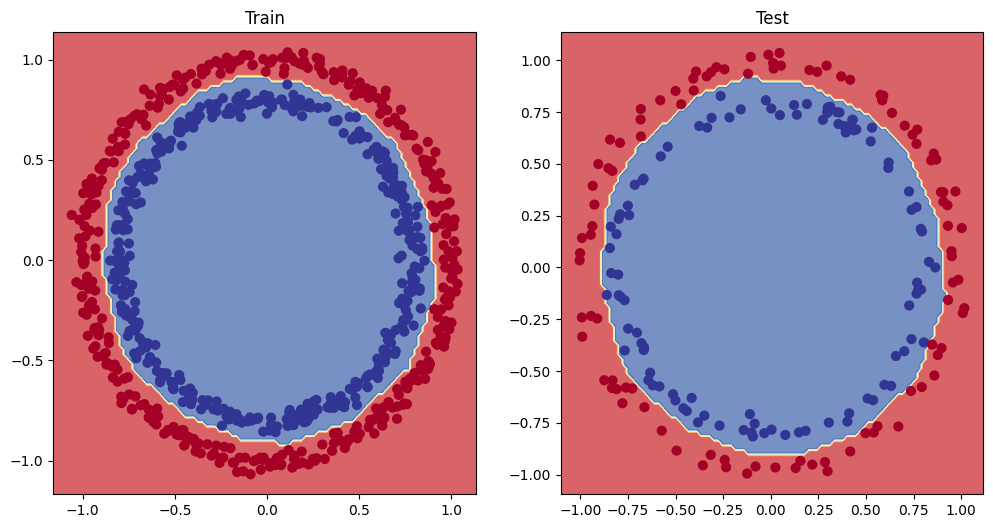

In [31]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model8, X=X_test, y=y_test)
plt.show()

#More classification evaluation methods

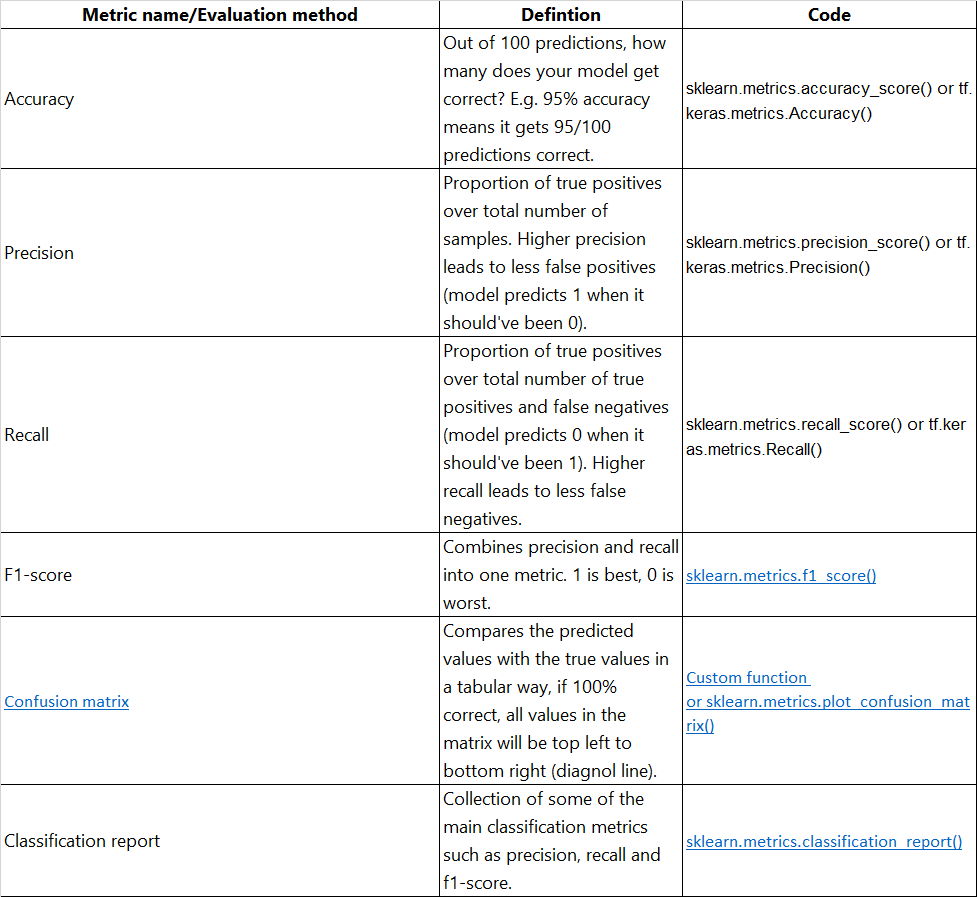

In [32]:
# Check the accuracy of the model
loss,accuracy=model8.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f'accuracy:{(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
loss:0.008905146270990372
accuracy:100.00%


In [33]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

#Make a prediction
y_preds=model8.predict(X_test)

y_preds[:10]

7/7 [==============================] - 0s 2ms/step


array([[9.9971086e-01],
       [1.4591083e-03],
       [9.9975932e-01],
       [1.0839766e-04],
       [9.9853987e-01],
       [9.9355453e-01],
       [1.9092986e-06],
       [1.8399642e-05],
       [9.9964410e-01],
       [2.0898430e-04]], dtype=float32)

In [34]:
#Convert prediction probability to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [35]:
# Create the confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   0],
       [  0, 100]])

In [125]:
# Creating confusion matrix plot

def plot_confusion_matrix(y_true, y_pred, classes=False, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if title is None:
        title = 'Normalized confusion matrix' if normalize else 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    n_classes = cm.shape[0]

    # Create classes
    if classes is None:
        labels = np.arange(n_classes)
    else:
        labels = classes

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # Label the axes
    ax.set(xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    threshold = cm.max() / 2.  # Set threshold for different colors
    for i, j in itertools.product(range(n_classes), range(n_classes)):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > threshold else "black")

    fig.tight_layout()
    plt.show()


Normalized confusion matrix


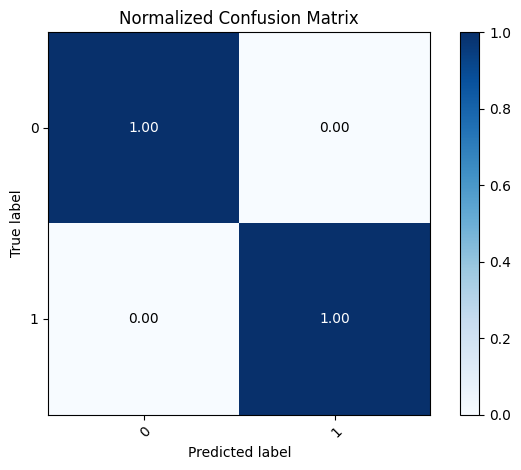

In [60]:

plot_confusion_matrix(y_test, y_preds, classes=None, normalize=True, title='Normalized Confusion Matrix')
plt.show()

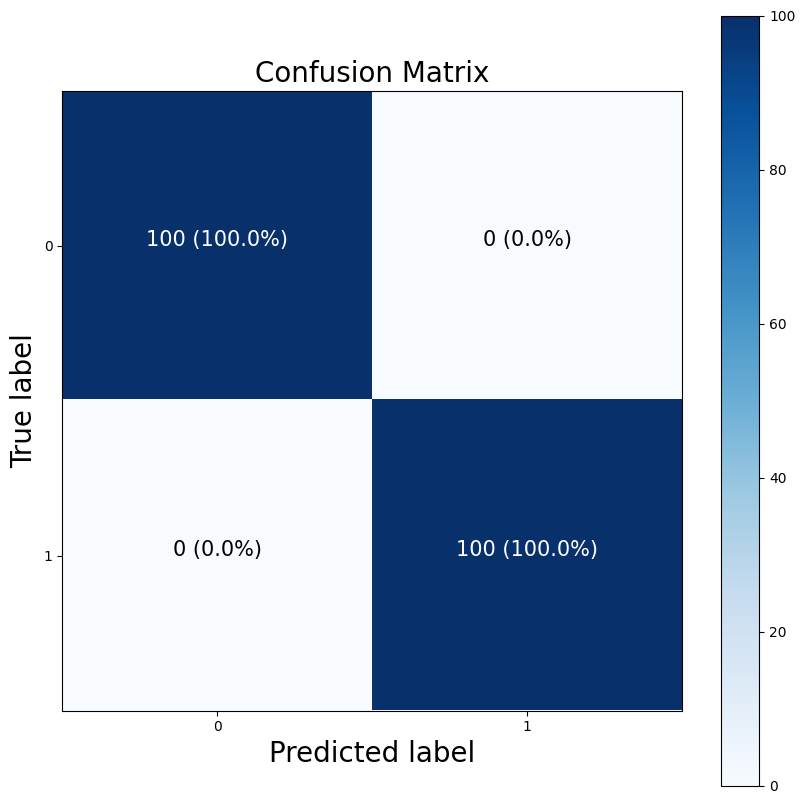

In [55]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [172]:
def plot_confusion_matrix2(y_true, y_pred, classes=None, figsize=(10, 10),text_size=10):
    """
    This function plots the confusion matrix.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Create classes
    if classes is None:
        labels = np.arange(n_classes)
    else:
        labels = classes

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(n_classes), range(n_classes)):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=15)

    plt.show()

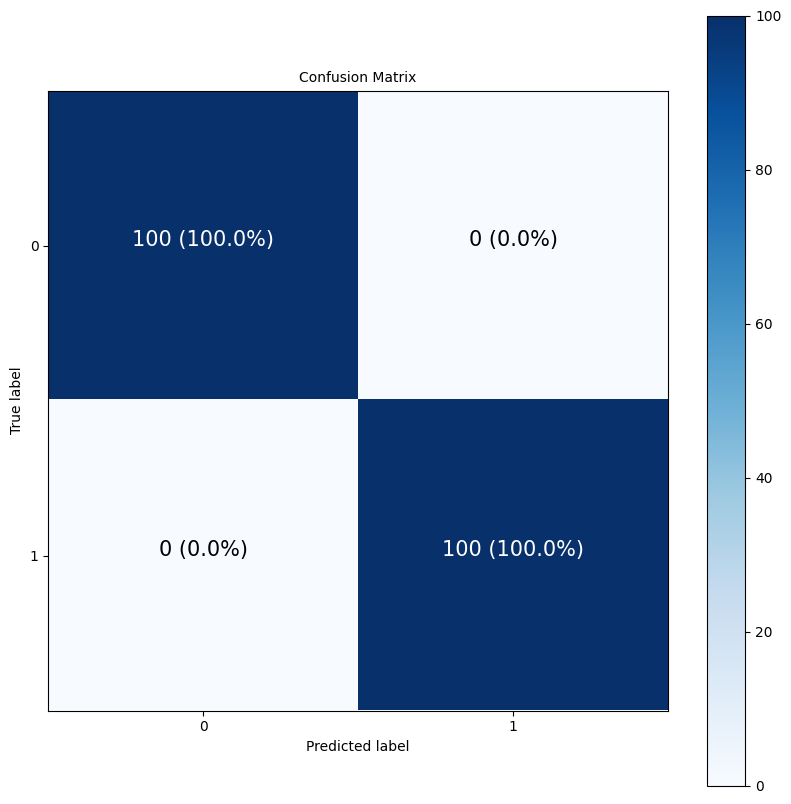

In [173]:
plot_confusion_matrix2(y_test,y_preds,classes=None,figsize=(10,10))

In [63]:
cm = confusion_matrix(y_test, tf.round(y_preds))
cm

array([[100,   0],
       [  0, 100]])

In [62]:
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
cm_norm

array([[1., 0.],
       [0., 1.]])

In [65]:
  n_classes = cm.shape[0]
  n_classes

2

In [66]:
labels = np.arange(n_classes)
labels

array([0, 1])

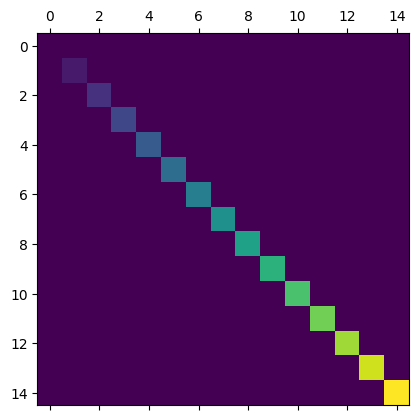

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# a 2D array with linearly increasing values on the diagonal
a = np.diag(range(15))
a
plt.matshow(a)

plt.show()

# Multi class Clasification


In [127]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [128]:
#Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [129]:
# Checking the shape of data
train_data.shape,train_labels.shape, test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

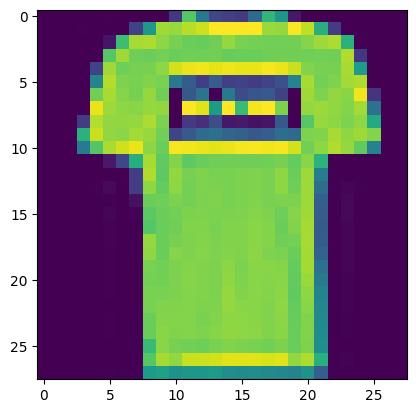

In [130]:
#Ploting a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[1])

In [131]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

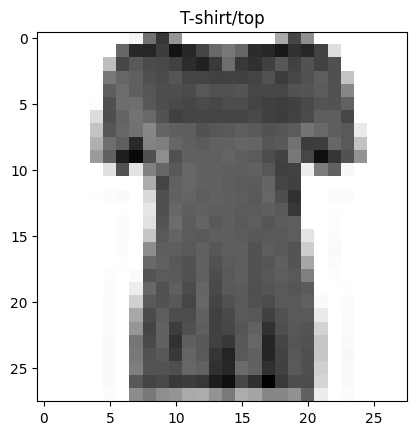

In [132]:
train_nr=10
plt.imshow(train_data[train_nr],cmap=plt.cm.binary)
plt.title(class_names[train_labels[1]])

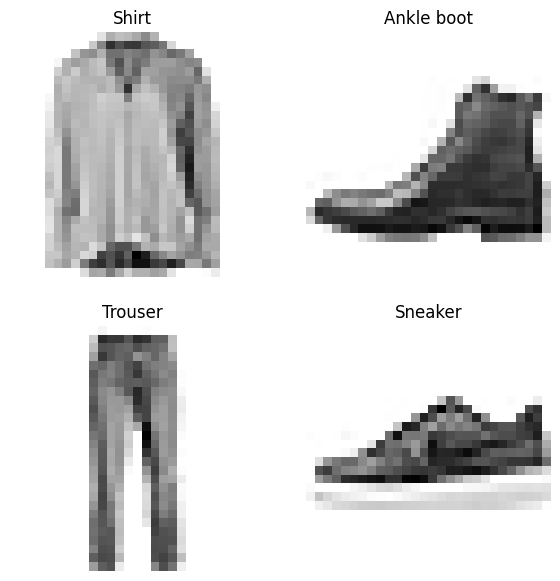

In [134]:
# Plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

#Build the multi-class clasification model

In [89]:
# Building the model

tf.random.set_seed(42)

# Create the model

model9=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), #input layer -reshape from 28x28 to 784
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])

# compile the model
#since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(),
#if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
model9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
#Fit the model
non_norm_history=model9.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4564 - accuracy: 0.1250 - val_loss: 2.1915 - val_accuracy: 0.1505
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1879 - accuracy: 0.1485 - val_loss: 2.1726 - val_accuracy: 0.1511
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1034 - accuracy: 0.1808 - val_loss: 1.8956 - val_accuracy: 0.2529
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6962 - accuracy: 0.3132 - val_loss: 1.6095 - val_accuracy: 0.3398
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5864 - accuracy: 0.3473 - val_loss: 1.5361 - val_accuracy: 0.3585
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4990 - accuracy: 0.3895 - val_loss: 1.4457 - val_accuracy: 0.4056
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4019 - accuracy: 0.4283 - val_loss: 1.3484 - val_accuracy:

In [91]:
# Check the model summary
model9.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 4)                 3140      
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
# Normalization of data
train_data.min(), train_data.max()

(0, 255)

In [161]:
train_data_norm=train_data / 255.0
test_data_norm=test_data / 255.0

train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [98]:
#Creating model with normalized data

tf.random.set_seed(42)

#Creating the model

model10=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax')])
#Compiling the model
model10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Fit the model
norm_history=model10.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0463 - accuracy: 0.6608 - val_loss: 0.7695 - val_accuracy: 0.7485
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6806 - accuracy: 0.7599 - val_loss: 0.6634 - val_accuracy: 0.7696
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6211 - accuracy: 0.7720 - val_loss: 0.6563 - val_accuracy: 0.7456
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5978 - accuracy: 0.7782 - val_loss: 0.6151 - val_accuracy: 0.7650
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5805 - accuracy: 0.7822 - val_loss: 0.6058 - val_accuracy: 0.7812
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5656 - accuracy: 0.7876 - val_loss: 0.5984 - val_accuracy: 0.7781
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.7963 - val_loss: 0.6119 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

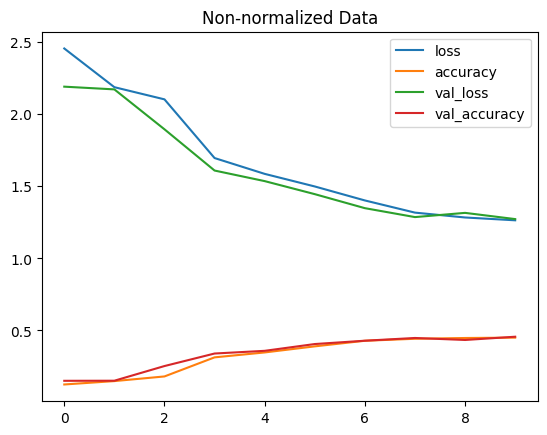

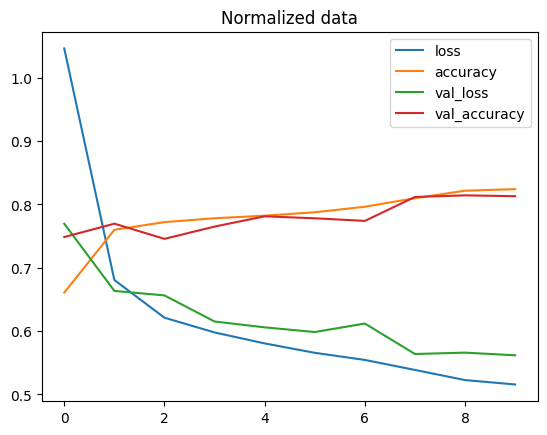

In [100]:
#ploting models history
import pandas as pd
#plon non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized Data')
#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

In [137]:
# find the ideal learning rate

#Set random seed
tf.random.set_seed(42)

#Creating the model

model11=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax')])

#Compile the model
model11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Create the learning rate callback

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

#fit the mode
find_lr_history=model11.fit(train_data_norm,train_labels, epochs=80,validation_data=(test_data_norm,test_labels),verbose=0)

Text(0.5, 1.0, 'Finding ideal learning rate')

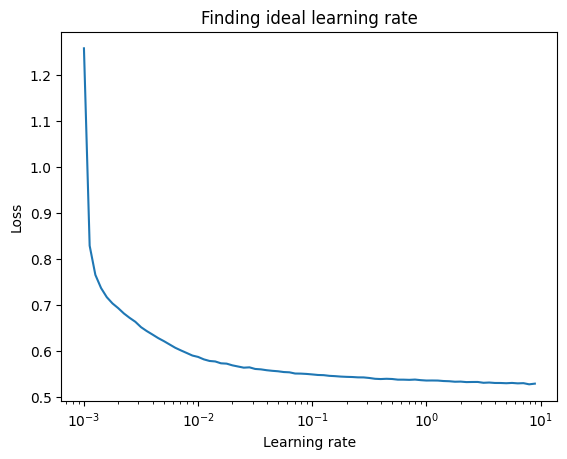

In [138]:
#Plot the learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt
lrs=1e-3*(10**(np.arange(80)/20))
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")

0.1

In [164]:

# Set random seed
tf.random.set_seed(42)

# Create the model using  a learning rate of 0.01
model12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history12 = model12.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels),
                       verbose=0)

In [165]:
# Make predictions
y_prob=model12.predict(test_data_norm)
y_prob[:5]

313/313 [==============================] - 0s 1ms/step


array([[3.25741887e-08, 5.97186300e-10, 1.62267444e-08, 7.27732504e-06,
        4.10915817e-07, 3.92608121e-02, 1.68692267e-07, 8.82938385e-01,
        2.82932706e-05, 7.77646676e-02],
       [1.92873413e-03, 9.32819385e-04, 7.21793175e-01, 5.66719928e-06,
        1.68900341e-01, 3.31797165e-25, 1.06438704e-01, 0.00000000e+00,
        5.59445539e-07, 0.00000000e+00],
       [5.14829066e-04, 9.97886598e-01, 4.83602456e-08, 1.59764581e-03,
        2.72583431e-08, 5.72370129e-29, 9.07982155e-07, 0.00000000e+00,
        4.69415340e-11, 0.00000000e+00],
       [1.63329719e-03, 9.88190174e-01, 4.08606070e-07, 1.01683158e-02,
        3.97278740e-07, 9.25740105e-25, 7.45661418e-06, 0.00000000e+00,
        3.13420023e-09, 3.36628073e-38],
       [3.14529032e-01, 7.50112114e-03, 1.48890391e-01, 8.10829550e-02,
        1.04785472e-01, 7.98317523e-10, 3.43078703e-01, 4.37499279e-22,
        1.32358517e-04, 3.19882459e-29]], dtype=float32)

In [166]:
y_prob[0]

array([3.2574189e-08, 5.9718630e-10, 1.6226744e-08, 7.2773250e-06,
       4.1091582e-07, 3.9260812e-02, 1.6869227e-07, 8.8293839e-01,
       2.8293271e-05, 7.7764668e-02], dtype=float32)

In [167]:
#Seethe predicted class number and label for the first example
y_prob[0].argmax(),class_names[y_prob[0].argmax()]

(7, 'Sneaker')

In [168]:
# Convert all the predictions from probabilites to labels
y_preds1=y_prob.argmax(axis=1)

#View the first 10 prediction labels
y_preds1[:10]

array([7, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [169]:
# Check confusion matrix

confusion_matrix(y_true=test_labels, y_pred=y_preds1)

array([[820,   1,  15, 104,  20,   2,  29,   0,   9,   0],
       [ 29, 906,   1,  60,   3,   1,   0,   0,   0,   0],
       [ 87,   0, 491,  22, 195,   1, 201,   0,   3,   0],
       [ 67,   9,   5, 863,  14,   4,  33,   0,   4,   1],
       [ 18,   0, 147,  66, 610,   1, 148,   0,  10,   0],
       [  0,   0,   0,   8,   0, 780,   0, 175,  11,  26],
       [276,   0, 134,  92, 246,   0, 234,   0,  18,   0],
       [  0,   0,   0,   0,   0,  38,   0, 848,   0, 114],
       [  2,   0,   5,  23,  70,  45,   5,   3, 845,   2],
       [  0,   0,   0,   3,   1,   5,   0,  73,   0, 918]])

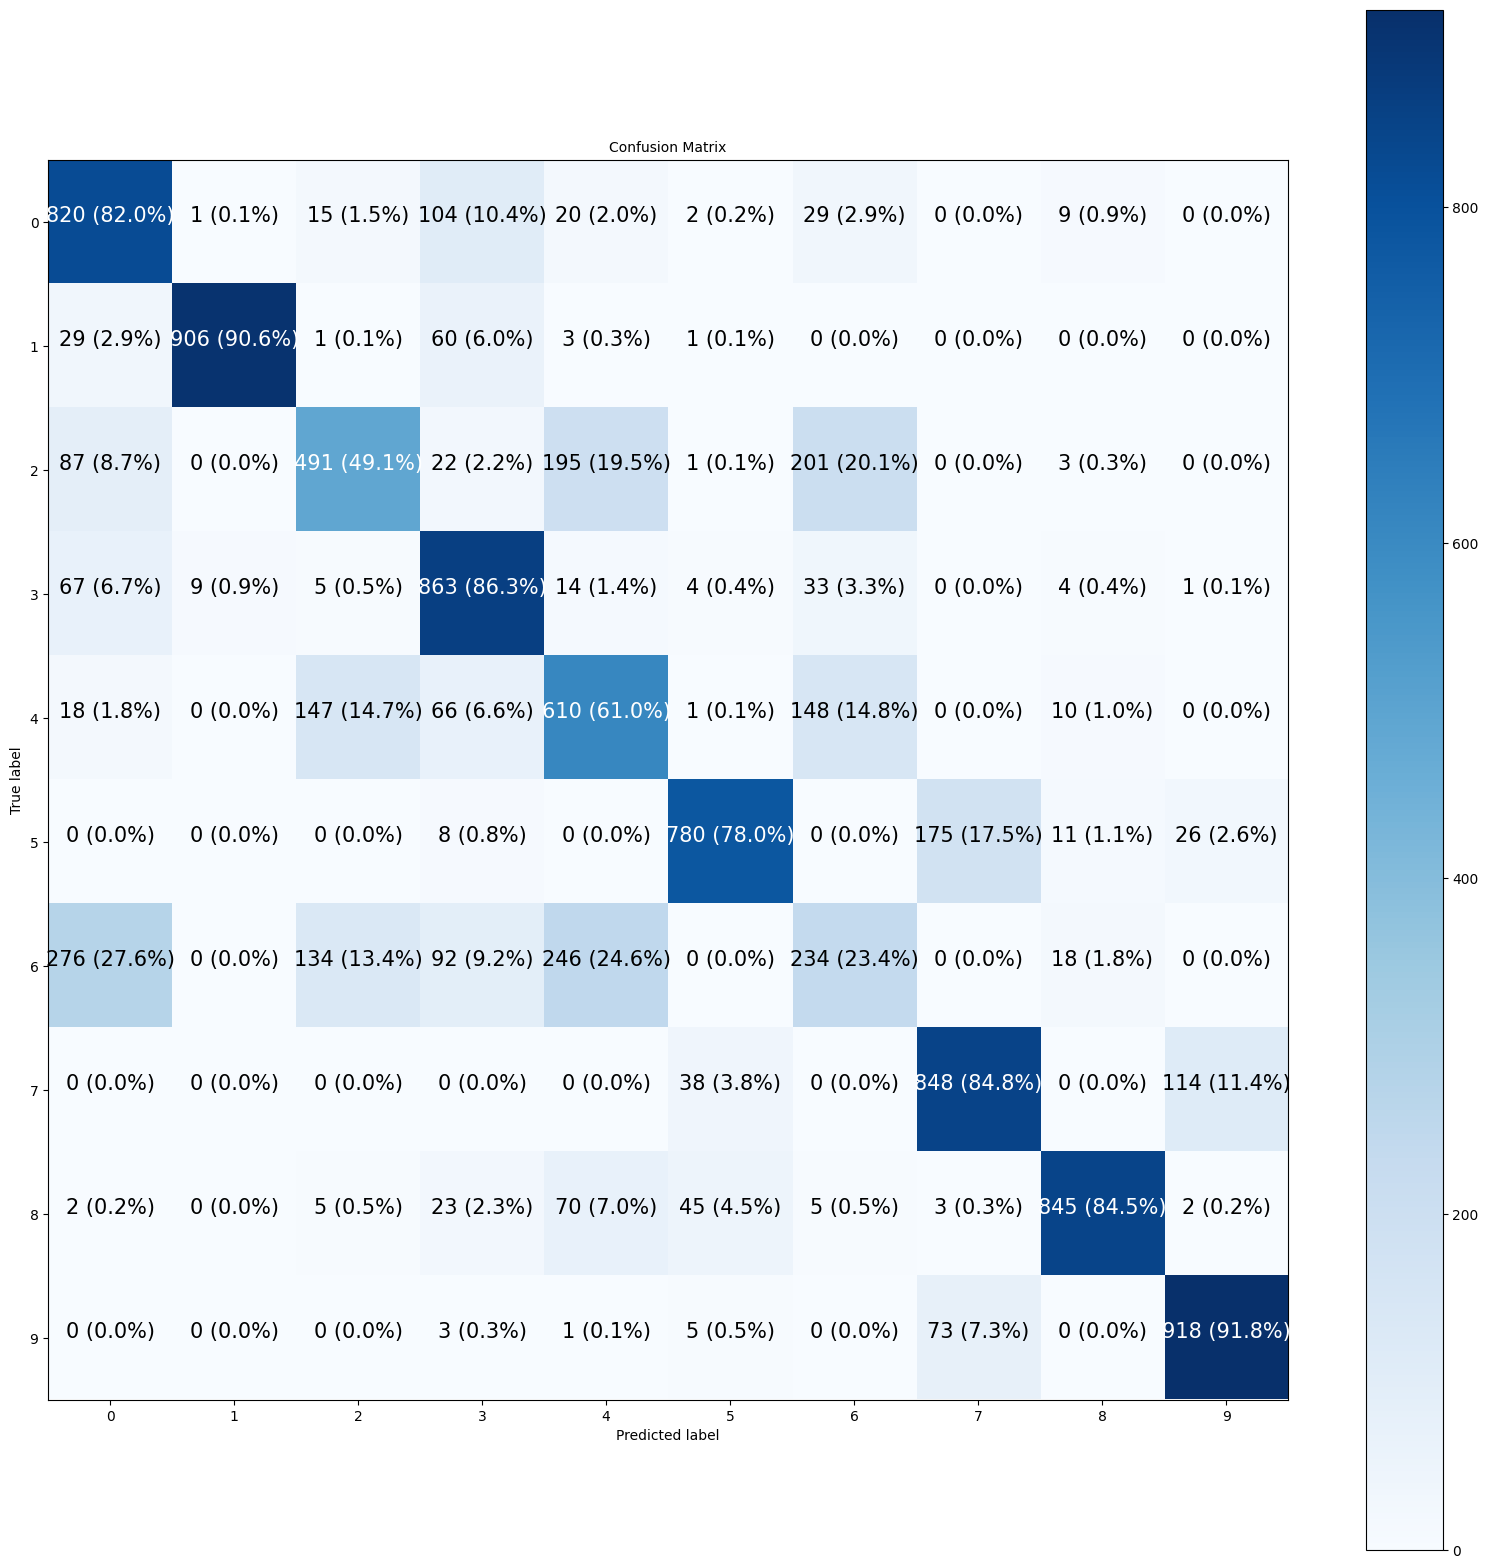

In [174]:
plot_confusion_matrix2(test_labels,y_preds1,classes=None,figsize=(20,20),text_size=10)